# Machine Learning Course Project 
## - Analysing what features required to predict a match in Speed Dating 
### By  Yinan Zhang and Tanmay Nagi

**Index:  
[Introduction](#intro)  
    [Methodology](#methods)  
        [Data](#data)  
[Data Preprocessing](#preprocessing)  
    [Visual Data Exploration](#visualisation)  
[Predictive Modelling](#model)  
    [Distance Based Model - K Nearest Neighbours](#knn)  
    [Probability Based Model - Naive Bayes](#nb)  
    [Information Based Model - Decision Tree](#dt)  
    [Information Based Model - Random Forrest](#rf)  
        [Final Comparison of Best Models](#compare)  
[Summary and Further Steps Forward](#summary)  
[Reference](#ref)**  







# Introduction <a name="intro"></a>

Dating is hard.   Especially in the modern age where everyone is overloaded with information but time poor. Many companies and startup try to make this problem easier with matching services.   Dating apps have grown to be a large and lucrative industry. Therefore optimizing the user experience is essential to be successful in being ahead of everyone else.
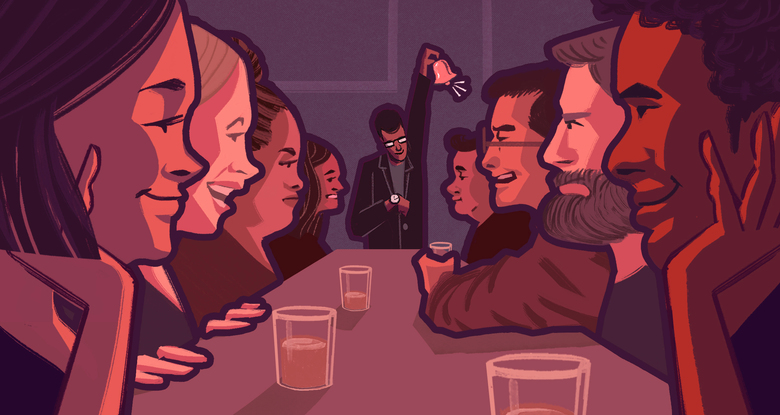

## Goal <a name="goal"></a>

So the two things people consider when using an app.  

1.  Save time
2.  Finding a right match

Our aim with this project is to identify correct matches for participants. Since no one likes to fill out forms.  Especially about intimate information. We will try to identify a list of 10 - 20 most important questions required for the machine learning models to be accurate.   We would like to model with as small number of inputs from the participants as possible and still achieve a good accuracy.

Therefore, our goal in this project is find
1. What is the best type of model to predict a match for the speed dating data
2. What are the best set of criterias to predict if two people will be a match.



# Methodology <a name="methods"></a>

We will be testing out four machine learning models on the numerical data.   Since we want to evaluate the models equally.We will loose too much information if we transform the categorical data into numerical.

The models we will evaluate will come from 3 different categorires.  They are:

1. Distance based model - K Nearest Neighbours(KNN)
2. Probability based model - Gaussian Naive Bayes (NB)
3. Information based model - Decision Tree (DT) and Random Forrest (RF)

The reason we are choosing these models is for their training speed.   Since social patterns will change constantly, the data will need to be constantly updated. Hence speed is important.  

Another reason to choose these models are they are base representatives of their specific type of model.  By evaluating the base models, we can gain an understanding on what is the best type of model to use for prediction.   When we determined the particular model type, we can apply more advanced models from that type to improve accuracy.  However that will be beyond the scope of this project.

We will split the data into 'Train' and 'Test' set.   Since we have a big enough data set (8378 rows) we split the train and test data 70% and 30%.   We will perform all hyperparameter tuning on the Train set to get the optimal parameters.   Only then will the model will be used on the test set.  This will ensure zero information leakage between the train and test.  This can also best evaluate the model performance.

We will be using the F1 score as our model evaluation metric.   F1 score is the harmonic score of precision and recall.  We are using this score because our data is imbalanced.  [Optimising F1 score is best when we have class imbalancce](https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124)


**For each model:**
1. Create a pipeline and list of parameters, run a cross validation and find the best parameters that optimize the F1 score.

2. Conduct feature selection via the F Score method and the Random Forrest Classifier features selection method to determine which set of features are required for match prediction.

2. Using the classifiers from both feature selection methods to predict both the training and test set.  Then look at the results to see of overfitting takes place.

3. Evaluate models by the confusion matrix, receiver operation characteristics (ROC) curve. 

4. Check which feature selection method is better by conducting a paired t-test on the cross validation results from two selection methods.  This will be used to determine which set of features is better for predicting.  If there is no significant difference, the the smaller set of features will be used and recommended.

**Rabbit hole**

Since we know that decision tree models work better on categorical data.   And since the data comes already with numerical features binned into categorical data.   We can also test if there is significant improvments in using categorical data on decision tree based models. 

**Evaluation**

Once all the models with their cross validation results are obtained.   We will then compare the cross validation results of all of the models to determine with is the best model to use.

The best model will be recommended with the set of features.   The final set of features is then the best set of features to be used with the final model to predict match for speed dating.



## Data <a name="data"></a>

The data is from [OpenML](https://www.openml.org/d/40536) was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.


## Attribute Information <a name="attr"></a> 

 * gender: Gender of self  
 * age: Age of self  
 * age_o: Age of partner  
 * d_age: Difference in age  
 * race: Race of self  
 * race_o: Race of partner  
 * samerace: Whether the two persons have the same race or not 
 * importance_same_race: How important is it that partner is of same race?  
 * importance_same_religion: How important is it that partner has same religion?  
 * field: Field of study  
 * pref_o_attractive: How important does partner rate attractiveness  
 * pref_o_sinsere: How important does partner rate sincerity  
 * pref_o_intelligence: How important does partner rate intelligence  
 * pref_o_funny: How important does partner rate being funny  
 * pref_o_ambitious: How important does partner rate ambition  
 * pref_o_shared_interests: How important does partner rate having shared interests  
 * attractive_o: Rating by partner (about me) at night of event on attractiveness  
 * sincere_o: Rating by partner (about me) at night of event on sincerity  
 * intelligence_o: Rating by partner (about me) at night of event on intelligence  
 * funny_o: Rating by partner (about me) at night of event on being funny  
 * ambitous_o: Rating by partner (about me) at night of event on being ambitious  
 * shared_interests_o: Rating by partner (about me) at night of event on shared interest  
 * attractive_important: What do you look for in a partner - attractiveness  
 * sincere_important: What do you look for in a partner - sincerity  
 * intellicence_important: What do you look for in a partner - intelligence  
 * funny_important: What do you look for in a partner - being funny  
 * ambtition_important: What do you look for in a partner - ambition  
 * shared_interests_important: What do you look for in a partner - shared interests  
 * attractive: Rate yourself - attractiveness  
 * sincere: Rate yourself - sincerity   
 * intelligence: Rate yourself - intelligence   
 * funny: Rate yourself - being funny   
 * ambition: Rate yourself - ambition  
 * attractive_partner: Rate your partner - attractiveness  
 * sincere_partner: Rate your partner - sincerity   
 * intelligence_partner: Rate your partner - intelligence   
 * funny_partner: Rate your partner - being funny   
 * ambition_partner: Rate your partner - ambition   
 * shared_interests_partner: Rate your partner - shared interests  
 * sports: Your own interests [1-10]  
 * tvsports  
 * exercise  
 * dining  
 * museums  
 * art  
 * hiking  
 * gaming  
 * clubbing  
 * reading  
 * tv  
 * theater  
 * movies  
 * concerts  
 * music  
 * shopping  
 * yoga  
 * interests_correlate: Correlation between participant’s and partner’s ratings of interests.  
 * expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?  
 * expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you? 
 * expected_num_matches: How many matches do you expect to get?  
 * like: Did you like your partner?  
 * guess_prob_liked: How likely do you think it is that your partner likes you?   
 * met: Have you met your partner before?  
 * decision: Decision at night of event.
 * decision_o: Decision of partner at night of event.  
 * match: Match (yes/no)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

# so that we can see all the columns
pd.set_option('display.max_columns', None) 

# set seed for reproducibility of results
np.random.seed(88)

# Importing the data

Missing values recorded as '?'

In [2]:
speeddating = pd.read_csv('speeddating.csv', na_values = '?')

Checking if the data is correctly imported

In [3]:
speeddating.shape

(8378, 123)

# Data Preprocessing<a name="preprocessing"></a>
## Overview of the data

In [4]:
speeddating.head()

has_null  wave  gender   age  age_o  d_age d_d_age  \
0         0     1  female  21.0   27.0      6   [4-6]   
1         0     1  female  21.0   22.0      1   [0-1]   
2         1     1  female  21.0   22.0      1   [0-1]   
3         0     1  female  21.0   23.0      2   [2-3]   
4         0     1  female  21.0   24.0      3   [2-3]   

                                      race  \
0  'Asian/Pacific Islander/Asian-American'   
1  'Asian/Pacific Islander/Asian-American'   
2  'Asian/Pacific Islander/Asian-American'   
3  'Asian/Pacific Islander/Asian-American'   
4  'Asian/Pacific Islander/Asian-American'   

                                    race_o  samerace  importance_same_race  \
0              European/Caucasian-American         0                   2.0   
1              European/Caucasian-American         0                   2.0   
2  'Asian/Pacific Islander/Asian-American'         1                   2.0   
3              European/Caucasian-American         0                   2.0   
4               'Latino/Hispanic American'         0                   2.0   

   importance_same_religion d_importance_same_race d_importance_same_religion  \
0                       4.0                  [2-5]                      [2-5]   
1                       4.0                  [2-5]                      [2-5]   
2                       4.0                  [2-5]                      [2-5]   
3                       4.0                  [2-5]                      [2-5]   
4                       4.0                  [2-5]                      [2-5]   

  field  pref_o_attractive  pref_o_sincere  pref_o_intelligence  pref_o_funny  \
0   Law               35.0            20.0                 20.0          20.0   
1   Law               60.0             0.0                  0.0          40.0   
2   Law               19.0            18.0                 19.0          18.0   
3   Law               30.0             5.0                 15.0          40.0   
4   Law               30.0            10.0                 20.0          10.0   

   pref_o_ambitious  pref_o_shared_interests d_pref_o_attractive  \
0               0.0                      5.0            [21-100]   
1               0.0                      0.0            [21-100]   
2              14.0                     12.0             [16-20]   
3               5.0                      5.0            [21-100]   
4              10.0                     20.0            [21-100]   

  d_pref_o_sincere d_pref_o_intelligence d_pref_o_funny d_pref_o_ambitious  \
0          [16-20]               [16-20]        [16-20]             [0-15]   
1           [0-15]                [0-15]       [21-100]             [0-15]   
2          [16-20]               [16-20]        [16-20]             [0-15]   
3           [0-15]                [0-15]       [21-100]             [0-15]   
4           [0-15]               [16-20]         [0-15]             [0-15]   

  d_pref_o_shared_interests  attractive_o  sinsere_o  intelligence_o  funny_o  \
0                    [0-15]           6.0        8.0             8.0      8.0   
1                    [0-15]           7.0        8.0            10.0      7.0   
2                    [0-15]          10.0       10.0            10.0     10.0   
3                    [0-15]           7.0        8.0             9.0      8.0   
4                   [16-20]           8.0        7.0             9.0      6.0   

   ambitous_o  shared_interests_o d_attractive_o d_sinsere_o d_intelligence_o  \
0         8.0                 6.0          [6-8]       [6-8]            [6-8]   
1         7.0                 5.0          [6-8]       [6-8]           [9-10]   
2        10.0                10.0         [9-10]      [9-10]           [9-10]   
3         9.0                 8.0          [6-8]       [6-8]           [9-10]   
4         9.0                 7.0          [6-8]       [6-8]           [9-10]   

  d_funny_o d_ambitous_o d_shared_interests_o  attractive_important  \
0     [6-8]      

**has_null** contains information on wether the line items have null values.

**wave** contains 1-21 which are the group numbers of the participants. 
They are redundant features and need to be removed as they are of no visual or predictive importance.

In [5]:
speeddating.drop(columns =['has_null', 'wave'], inplace = True)

Here is a list of all columns

In [6]:
print(list(speeddating.columns))

['gender', 'age', 'age_o', 'd_age', 'd_d_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funn

It appears that the data has already been preprocessed with numerical columns binned with into categorical columns, we will separate this into a new data frame which could be used for predictive modelling later and all other categorical columns will be droped.

In [7]:
#filter for all columns starting with d_
filter_col = [col for col in speeddating if col.startswith('d_')]
df_d = speeddating[filter_col].drop(columns = 'd_age').copy()
df_d.head()

d_d_age d_importance_same_race d_importance_same_religion  \
0   [4-6]                  [2-5]                      [2-5]   
1   [0-1]                  [2-5]                      [2-5]   
2   [0-1]                  [2-5]                      [2-5]   
3   [2-3]                  [2-5]                      [2-5]   
4   [2-3]                  [2-5]                      [2-5]   

  d_pref_o_attractive d_pref_o_sincere d_pref_o_intelligence d_pref_o_funny  \
0            [21-100]          [16-20]               [16-20]        [16-20]   
1            [21-100]           [0-15]                [0-15]       [21-100]   
2             [16-20]          [16-20]               [16-20]        [16-20]   
3            [21-100]           [0-15]                [0-15]       [21-100]   
4            [21-100]           [0-15]               [16-20]         [0-15]   

  d_pref_o_ambitious d_pref_o_shared_interests d_attractive_o d_sinsere_o  \
0             [0-15]                    [0-15]          [6-8]       [6-8]   
1             [0-15]                    [0-15]          [6-8]       [6-8]   
2             [0-15]                    [0-15]         [9-10]      [9-10]   
3             [0-15]                    [0-15]          [6-8]       [6-8]   
4             [0-15]                   [16-20]          [6-8]       [6-8]   

  d_intelligence_o d_funny_o d_ambitous_o d_shared_interests_o  \
0            [6-8]     [6-8]        [6-8]                [6-8]   
1           [9-10]     [6-8]        [6-8]                [0-5]   
2           [9-10]    [9-10]       [9-10]               [9-10]   
3           [9-10]     [6-8]       [9-10]                [6-8]   
4           [9-10]     [6-8]       [9-10]                [6-8]   

  d_attractive_important d_sincere_important d_intellicence_important  \
0                 [0-15]             [16-20]                  [16-20]   
1                 [0-15]             [16-20]                  [16-20]   
2                 [0-15]             [16-20]                  [16-20]   
3                 [0-15]             [16-20]                  [16-20]   
4                 [0-15]             [16-20]                  [16-20]   

  d_funny_important d_ambtition_important d_shared_interests_important  \
0            [0-15]                [0-15]                       [0-15]   
1            [0-15]                [0-15]                       [0-15]   
2            [0-15]                [0-15]                       [0-15]   
3            [0-15]                [0-15]                       [0-15]   
4            [0-15]                [0-15]                       [0-15]   

  d_attractive d_sincere d_intelligence d_funny d_ambition  \
0        [6-8]     [6-8]          [6-8]   [6-8]      [6-8]   
1        [6-8]     [6-8]          [6-8]   [6-8]      [6-8]   
2        [6-8]     [6-8]          [6-8]   [6-8]      [6-8]   
3        [6-8]     [6-8]          [6-8]   [6-8]      [6-8]   
4        [6-8]     [6-8]          [6-8]   [6-8]      [6-8]   

  d_attractive_partner d_sincere_partner d_intelligence_partner  \
0                [6-8]            [9-10]                  [6-8]   
1                [6-8]             [6-8]                  [6-8]   
2                [0-5]             [6-8]                 [9-10]   
3                [6-8]             [6-8]                  [6-8]   
4                [0-5]             [6-8]                  [6-8]   

  d_funny_partner d_ambition_partner d_shared_interests_partner d_sports  \
0           [6-8]              [6-8]                      [0-5]   [9-10]   
1           [6-8]              [0-5]                      [6-8]   [9-10]   
2           [6-8]              [0-5]                      [6-8]   [9-10]   
3           [6-8]              [6-8]                      [6-8]   [9-10]   
4           [6-8]              [6-8]                      [6-8]   [9-10]   

  d_tvsports d_exercise d_dining d_museums  d_art d_hiking d_gaming  \
0      [0-5]      [6-8]   [9-10]     [0-5]  [0-5]    [0-5]    [0-5]   
1      [0-5]      [6-8]   [9-

### Check for values in the categorical data

In [8]:
for col in df_d:
    print(df_d[col].value_counts())

[2-3]     2406
[4-6]     2316
[0-1]     2227
[7-37]    1429
Name: d_d_age, dtype: int64
[2-5]     3104
[0-1]     2885
[6-10]    2389
Name: d_importance_same_race, dtype: int64
[0-1]     3111
[2-5]     3013
[6-10]    2254
Name: d_importance_same_religion, dtype: int64
[21-100]    3010
[16-20]     2874
[0-15]      2494
Name: d_pref_o_attractive, dtype: int64
[16-20]     3820
[0-15]      3065
[21-100]    1493
Name: d_pref_o_sincere, dtype: int64
[16-20]     4272
[21-100]    2517
[0-15]      1589
Name: d_pref_o_intelligence, dtype: int64
[16-20]     3870
[0-15]      3188
[21-100]    1320
Name: d_pref_o_funny, dtype: int64
[0-15]      6680
[16-20]     1603
[21-100]      95
Name: d_pref_o_ambitious, dtype: int64
[0-15]      6085
[16-20]     1962
[21-100]     331
Name: d_pref_o_shared_interests, dtype: int64
[6-8]     4537
[0-5]     2971
[9-10]     870
Name: d_attractive_o, dtype: int64
[6-8]     5192
[9-10]    1665
[0-5]     1521
Name: d_sinsere_o, dtype: int64
[6-8]     5379
[9-10]    1782


There does not appear to be any strange or weird values in the categorical columns.

### A look at the numerical features 

In [9]:
col_num = speeddating.columns[speeddating.dtypes!='object']
df_num = speeddating[col_num]
df_num.head()

age  age_o  d_age  samerace  importance_same_race  \
0  21.0   27.0      6         0                   2.0   
1  21.0   22.0      1         0                   2.0   
2  21.0   22.0      1         1                   2.0   
3  21.0   23.0      2         0                   2.0   
4  21.0   24.0      3         0                   2.0   

   importance_same_religion  pref_o_attractive  pref_o_sincere  \
0                       4.0               35.0            20.0   
1                       4.0               60.0             0.0   
2                       4.0               19.0            18.0   
3                       4.0               30.0             5.0   
4                       4.0               30.0            10.0   

   pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
0                 20.0          20.0               0.0   
1                  0.0          40.0               0.0   
2                 19.0          18.0              14.0   
3                 15.0          40.0               5.0   
4                 20.0          10.0              10.0   

   pref_o_shared_interests  attractive_o  sinsere_o  intelligence_o  funny_o  \
0                      5.0           6.0        8.0             8.0      8.0   
1                      0.0           7.0        8.0            10.0      7.0   
2                     12.0          10.0       10.0            10.0     10.0   
3                      5.0           7.0        8.0             9.0      8.0   
4                     20.0           8.0        7.0             9.0      6.0   

   ambitous_o  shared_interests_o  attractive_important  sincere_important  \
0         8.0                 6.0                  15.0               20.0   
1         7.0                 5.0                  15.0               20.0   
2        10.0                10.0                  15.0               20.0   
3         9.0                 8.0                  15.0               20.0   
4         9.0                 7.0                  15.0               20.0   

   intellicence_important  funny_important  ambtition_important  \
0                    20.0             15.0                 15.0   
1                    20.0             15.0                 15.0   
2                    20.0             15.0                 15.0   
3                    20.0             15.0                 15.0   
4                    20.0             15.0                 15.0   

   shared_interests_important  attractive  sincere  intelligence  funny  \
0                        15.0         6.0      8.0           8.0    8.0   
1                        15.0         6.0      8.0           8.0    8.0   
2                        15.0         6.0      8.0           8.0    8.0   
3                        15.0         6.0      8.0           8.0    8.0   
4                        15.0         6.0      8.0           8.0    8.0   

   ambition  attractive_partner  sincere_partner  intelligence_partner  \
0       7.0                 6.0              9.0                   7.0   
1       7.0                 7.0              8.0                   7.0   
2       7.0                 5.0              8.0                   9.0   
3       7.0                 7.0              6.0                   8.0   
4       7.0                 5.0              6.0                   7.0   

   funny_partner  ambition_partner  shared_interests_partner  sports  \
0            7.0               6.0                       5.0     9.0   
1            8.0               5.0                       6.0     9.0   
2            8.0               5.0                       7.0     9.0   
3            7.0               6.0                       8.0     9.0   
4            7.0               6.0                       6.0     9.0   

   tvsports  exercise  dining  museums  art  hiking  gaming  clubbing  \
0       2.0       8.0     9.0      1.0  1.0     5.0     1.0       5.0   
1       2.0       8.0     9.0      1.0  1.0     5.0     1.0       5.0   
2       2.0   

Basic descriptive statistics for the numerical data

In [10]:
df_num.describe()

age        age_o        d_age     samerace  \
count  8283.000000  8274.000000  8378.000000  8378.000000   
mean     26.358928    26.364999     4.185605     0.395799   
std       3.566763     3.563648     4.596171     0.489051   
min      18.000000    18.000000     0.000000     0.000000   
25%      24.000000    24.000000     1.000000     0.000000   
50%      26.000000    26.000000     3.000000     0.000000   
75%      28.000000    28.000000     5.000000     1.000000   
max      55.000000    55.000000    37.000000     1.000000   

       importance_same_race  importance_same_religion  pref_o_attractive  \
count           8299.000000               8299.000000        8289.000000   
mean               3.784793                  3.651645          22.495347   
std                2.845708                  2.805237          12.569802   
min                0.000000                  1.000000           0.000000   
25%                1.000000                  1.000000          15.000000   
50%                3.000000                  3.000000          20.000000   
75%                6.000000                  6.000000          25.000000   
max               10.000000                 10.000000         100.000000   

       pref_o_sincere  pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
count     8289.000000          8289.000000   8280.000000       8271.000000   
mean        17.396867            20.270759     17.459714         10.685375   
std          7.044003             6.782895      6.085526          6.126544   
min          0.000000             0.000000      0.000000          0.000000   
25%         15.000000            17.390000     15.000000          5.000000   
50%         18.370000            20.000000     18.000000         10.000000   
75%         20.000000            23.810000     20.000000         15.000000   
max         60.000000            50.000000     50.000000         53.000000   

       pref_o_shared_interests  attractive_o    sinsere_o  intelligence_o  \
count              8249.000000   8166.000000  8091.000000     8072.000000   
mean                 11.845930      6.190411     7.175256        7.369301   
std                   6.362746      1.950305     1.740575        1.550501   
min                   0.000000      0.000000     0.000000        0.000000   
25%                   9.520000      5.000000     6.000000        6.000000   
50%                  10.640000      6.000000     7.000000        7.000000   
75%                  16.000000      8.000000     8.000000        8.000000   
max                  30.000000     10.500000    10.000000       10.000000   

           funny_o   ambitous_o  shared_interests_o  attractive_important  \
count  8018.000000  7656.000000         7302.000000           8299.000000   
mean      6.400599     6.778409            5.474870             22.514632   
std       1.954078     1.794080            2.156163             12.587674   
min       0.000000     0.000000            0.000000              0.000000   
25%       5.000000     6.000000            4.000000             15.000000   
50%       7.000000     7.000000            6.000000             20.000000   
75%       8.000000     8.000000            7.000000             25.000000   
max      11.000000    10.000000           10.000000            100.000000   

       sincere_important  intellicence_important  funny_important  \
count        8299.000000             8299.000000      8289.000000   
mean           17.396389               20.265613        17.457043   
std             7.046700                6.783003         6.085239   
min             0.000000                0.000000         0.000000   
25%            15.000000               17.390000        15.000000   
50%            18.180000               20.000000        18.000000   
75%            20.000000               23.810000        20.000000   
max            60.000000               50.000000        50.000000   

       ambtition_important  shared_interests_important   attractive

We will use the numerical data for predictive modelling since they offer more information. We will use categorical data to test information base algorithms as they do perform better.  However due to the loss of information from binning the numerical data into categories, there will be information lost.  This could potentially affect the performance.

## Checking Missing Values

### Numerical features

In [11]:
print("Total Number of missing values in the numerical data is",df_num.isna().sum().sum())
df_num.isna().sum()

Total Number of missing values in the numerical data is 18173


age                                95
age_o                             104
d_age                               0
samerace                            0
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive                        105
sincere                           105
intelligence

The numerical data has multiple missing values in different columns 

### Categorical features 

In [12]:
print("Total Number of missing values in the categorical data is",df_d.isna().sum().sum())
df_d.isna().sum()

Total Number of missing values in the categorical data is 0


d_d_age                            0
d_importance_same_race             0
d_importance_same_religion         0
d_pref_o_attractive                0
d_pref_o_sincere                   0
d_pref_o_intelligence              0
d_pref_o_funny                     0
d_pref_o_ambitious                 0
d_pref_o_shared_interests          0
d_attractive_o                     0
d_sinsere_o                        0
d_intelligence_o                   0
d_funny_o                          0
d_ambitous_o                       0
d_shared_interests_o               0
d_attractive_important             0
d_sincere_important                0
d_intellicence_important           0
d_funny_important                  0
d_ambtition_important              0
d_shared_interests_important       0
d_attractive                       0
d_sincere                          0
d_intelligence                     0
d_funny                            0
d_ambition                         0
d_attractive_partner               0
d

The categorical(binned) features are void of any empty values

## Dealing with missing values 

Missing values observed in the numerical data will be imputed with the mean.

In [13]:
for col in df_num:
    df_num[col] = df_num[col].fillna(df_num[col].mean())

Recalculate d_age since we notice that previously, if age = na and age_o = 24 then d_age = 24.   This cause some large numbers.

In [14]:
df_num['d_age']=abs(df_num['age']- df_num['age_o'])
df_num.describe()

age        age_o        d_age     samerace  \
count  8378.000000  8378.000000  8378.000000  8378.000000   
mean     26.358928    26.364999     3.654474     0.395799   
std       3.546480     3.541458     3.045586     0.489051   
min      18.000000    18.000000     0.000000     0.000000   
25%      24.000000    24.000000     1.000000     0.000000   
50%      26.000000    26.000000     3.000000     0.000000   
75%      28.000000    28.000000     5.000000     1.000000   
max      55.000000    55.000000    32.000000     1.000000   

       importance_same_race  importance_same_religion  pref_o_attractive  \
count           8378.000000               8378.000000        8378.000000   
mean               3.784793                  3.651645          22.495347   
std                2.832258                  2.791978          12.502851   
min                0.000000                  1.000000           0.000000   
25%                1.000000                  1.000000          15.000000   
50%                3.000000                  3.000000          20.000000   
75%                6.000000                  6.000000          25.000000   
max               10.000000                 10.000000         100.000000   

       pref_o_sincere  pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
count     8378.000000          8378.000000   8378.000000       8378.000000   
mean        17.396867            20.270759     17.459714         10.685375   
std          7.006484             6.746767      6.049825          6.087291   
min          0.000000             0.000000      0.000000          0.000000   
25%         15.000000            17.650000     15.000000          5.000000   
50%         18.000000            20.000000     18.000000         10.000000   
75%         20.000000            23.260000     20.000000         15.000000   
max         60.000000            50.000000     50.000000         53.000000   

       pref_o_shared_interests  attractive_o    sinsere_o  intelligence_o  \
count              8378.000000   8378.000000  8378.000000     8378.000000   
mean                 11.845930      6.190411     7.175256        7.369301   
std                   6.313565      1.925469     1.710499        1.521919   
min                   0.000000      0.000000     0.000000        0.000000   
25%                  10.000000      5.000000     6.000000        7.000000   
50%                  11.360000      6.000000     7.000000        7.369301   
75%                  15.690000      8.000000     8.000000        8.000000   
max                  30.000000     10.500000    10.000000       10.000000   

           funny_o   ambitous_o  shared_interests_o  attractive_important  \
count  8378.000000  8378.000000         8378.000000           8378.000000   
mean      6.400599     6.778409            5.474870             22.514632   
std       1.911629     1.715024            2.012929             12.528179   
min       0.000000     0.000000            0.000000              0.000000   
25%       5.000000     6.000000            4.000000             15.000000   
50%       6.400599     7.000000            5.474870             20.000000   
75%       8.000000     8.000000            7.000000             25.000000   
max      11.000000    10.000000           10.000000            100.000000   

       sincere_important  intellicence_important  funny_important  \
count        8378.000000             8378.000000      8378.000000   
mean           17.396389               20.265613        17.457043   
std             7.013394                6.750943         6.052827   
min             0.000000                0.000000         0.000000   
25%            15.000000               17.650000        15.000000   
50%            18.180000               20.000000        18.000000   
75%            20.000000               23.260000        20.000000   
max            60.000000               50.000000        50.000000   

       ambtition_important  shared_interests_important   attractive

Here we conduct a final check to make sure all missing values are handled

In [15]:
print("Total Number of missing values in the numerical data is",df_num.isna().sum().sum())

Total Number of missing values in the numerical data is 0


Now we have 2 dataframes 
1. Numerical features 
2. Categorical features 

There are no unusual or missing values in any of the columns and everything has been handled 

# Visual Data Exploration <a name="visualisation"></a>

We will try to explore the different variables present in the data and try to find relationships and trends present which would be helpful to our research question, this visual analysis is conducted on a small subset of the original data to reduce the size of graphs output.   While we could be doing it on a larger sample, the resulting graphs will crash the notebook.

## Sampling the data

In [16]:
datavis = df_num.sample(100, random_state = 88)
print("Target variable in the orignial data")
df_num['match'].value_counts(normalize=True).round(3)

Target variable in the orignial data


0    0.835
1    0.165
Name: match, dtype: float64

In [17]:
print("Target variable in the sample data")
datavis['match'].value_counts(normalize=True)

Target variable in the sample data


0    0.87
1    0.13
Name: match, dtype: float64

It is verified that the sample data is representative of the original data 

## Single feature Visuals 
**A histogram of the target variable**

In [18]:
datavis['match'] = datavis['match'].replace({0:'No', 1:'Yes'})
import altair as alt
chart=alt.Chart(datavis, width = 200, title = 'Histogram of Match(Target Data)').mark_bar().encode(x = 'match',                                                                                            
                                                                                             y = 'count()')
text = chart.mark_text(dy=-5).encode(
alt.X('match', title='Match',  sort=None),
    alt.Y('count()', title='Count of records'),
text='count()'
)
chart+text

alt.LayerChart(...)

Close to 90% of dates the result is no match, which shows how difficult it is to get a right match.   This also is an indication of the imbalance in our data.   We need to be aware of this and manage it appropriately in the modelling process.

**We want to ask the question "How much do people preferring attractiveness ?"**

In [19]:
chart=alt.Chart(datavis, width = 300, title = 'Histogram of Prefer attractive').mark_bar(
).encode(alt.X('pref_o_attractive', bin=True,title="Preference of attractiveness"),
         alt.Y('count()'))
chart

alt.Chart(...)

Nearly 4/5th of the respondents reported to prefer attractivness less than 30%, apparently attractivness is not one of the top qualities people look for.

**We also want to ask: "How much do people preferring sincerity ?"**

In [20]:
alt.Chart(datavis, width = 300, title = 'Histogram of Preference of sincerity').mark_bar(
).encode(alt.X('pref_o_sincere', bin=alt.Bin(maxbins=12),title ="Preference of sincerity"),
         alt.Y('count()'))

alt.Chart(...)

Nearly three quarters of the respondents said they preference of a sincere partner is 15-30%

**Funny is one of the qualities that everyone seems to want.  So next, we would like to see "How much do people preferring their partner being funny ?"**

In [21]:
alt.Chart(datavis, width = 300, title = 'Histogram of Prefer Funny').mark_bar(
).encode(alt.X('pref_o_funny', bin=True),
         alt.Y('count()'))

alt.Chart(...)

Well, looks like more people to like their partner being funny.  As can be noticed from the left skew of the data.   More value is on the top end.

**To get an idea of each of the features, we produced a group of histogram for all features in the data**

This can give us some understanding of how the data is distributed for each of the features.

In [22]:
chart = alt.hconcat()
for col in datavis.columns:    
    base = alt.Chart(datavis, width = 200).mark_bar(
    ).encode(alt.X(col),
             alt.Y('count()'))
    chart |= base
chart

alt.HConcatChart(...)

## Two-feature Visuals
**Boxplot to see if getting a match depends on age difference in partners**

Let's look at a box plot to see if getting a match depends on age difference in partners 

In [23]:
alt.Chart(datavis, title = 'Age Difference make a difference in Match', width = 200).mark_boxplot().encode(
    x='match',
    y='d_age:Q',
    color = 'match'
)

alt.Chart(...)

Apparently the difference in age is slightly important, as can be seen by above boxplot, median difference in age for a match is 2 and for non match is 3

**A box plot to see if getting a match depends on correlation of partner interests**

In [24]:
alt.Chart(datavis, title = 'Does interest correlation makes a difference in the match', width = 200).mark_boxplot().encode(
    x='match',
    y='interests_correlate:Q',
    color = 'match'
)

alt.Chart(...)

This boxplot is quite interesting and shows it is very important for at-least half of the interests to correlate to get a match.

**A heatmap to understand the decision making process at the event night**

In [25]:
heat = alt.Chart(datavis, width = 200, height = 200,
                title = 'Decision matrix of the participants').mark_rect().encode(
    x=alt.X('decision:O',title="Decision at event night ",axis=alt.Axis(labelAngle=360)),
    y=alt.Y('decision_o:O',title ="Partners decision at event night" ),
    color='count()'
)
text = heat.mark_text(baseline='middle').encode(text = 'count()', color = alt.value('orange'))
heat + text

alt.LayerChart(...)

Only when both decision are yes, then we have a match.  Hence match only comes from (yes and yes) while (no,no), (yes,no) and (no, yes) will result in a no match.   This is the cause of the class imbalance.   Interestingly, the occurances where one party is interested and other party is not interested together sums up to more than both parties are not interested.

**A bar chart to see difference in like between matches and non matches**

We would expect that a match will occure if one party rate highly on the like

In [26]:
alt.Chart(datavis,
          width = 300,height=100
         ).mark_bar(
).encode(
    y='match',
    x='mean(like)')

alt.Chart(...)

Mean liking is nearly 7/10 for being a match

**Bar charts to see how happy different demographics expect to be meeting their dates in the speed dating event**

In [27]:
sd_sub = speeddating.sample(100, random_state = 88)
ch1 = alt.Chart(sd_sub, title = 'Expected happiness meeting potential partners',
          width = 200,height=100
         ).mark_bar(
).encode(
    y='gender',
    x=alt.X('mean(expected_happy_with_sd_people)' ),
)
ch2 = alt.Chart(sd_sub,
          width = 300
         ).mark_bar(
).encode(
    y='age:O',
    x='mean(expected_happy_with_sd_people)',
)
alt.vconcat(ch1,ch2)

alt.VConcatChart(...)

It's interesting what we see her
1. Men expect to be more happy compared to their female counterparts.
2. Also people who are 31 and 32 years of age expect to much happier compared to the rest

## Multivariate Visuals 

**A scatter plot to understand partners consider having the same sex race and religion to be important**

In [28]:
alt.Chart(datavis,
          width = 300
         ).mark_point(
).encode(
    x='importance_same_religion',
    y='importance_same_race',
    color = 'match',
    size = 'count()'
).facet(column = 'match')

alt.FacetChart(...)

Those who got a match did not believe that having the same race and religion are both important, we can see higher numbers for low importance for both of these combined.

In [29]:
alt.Chart(sd_sub,
          width = 200,title="Expected number of matches for male/females and their decision"
         ).mark_bar(
).encode(
    x=alt.X('gender:O', title="" ,axis=alt.Axis(labelAngle=360)),
    y=alt.Y('mean(expected_num_matches)',title="Average of expected number of likes"),
   column=alt.Column('decision') )

alt.Chart(...)

This shows that men who decide on a date have a higher number of expected matches compared to females, infact when women have a lower number of expected matches when they decided on a date. This shows women are choosy and do not like to keep a lot of options.

In [30]:
alt.Chart(sd_sub,
          width = 200,title="Guessing the probability that the partner liked you and their decision for male/females"
         ).mark_bar(
).encode(
    x=alt.Y('gender', title="" ,axis=alt.Axis(labelAngle=360)),
    y=alt.X('mean(guess_prob_liked)',title="Average of probablity that partner liked you "),
   color=alt.Color('gender:N'),column='decision_o' )

alt.Chart(...)

Apparently females guess right more times than men, it can be seen here when women had said they their partner probably did not like them they were right. Men tend to assume that they were liked while actully they were not.

Another interesting insight is when men thought that their partner did not like them they were off.  
Do women have a better intuition? This is something to think about :)

# Predictive Modelling<a name="model"></a>

## Setting up the data for Machine Learning

From the previous exploration.  We see that categorical data have already been tranformed into numerical data.   For example, 'race' of each party have been tranformed into 'same race' where 1 = when the race match and 0 is when the race doesn't match.  Other categorical columns are binned transformation of the numerical columns. 

To ensure consistency, we will evaluate models first on the numerical features. Since we will be using models such as KNN and Naive Bayes where numerical features are required.  

Preparing the numerical data for machine learning.

In [31]:
#dropping the variables not needed for modelling and the target variable to create descriptive features 
droplist = ['age','age_o', 'decision','decision_o', 'match']
data = df_num.drop(columns = droplist)
#saving the target feature in a separate pandas series 
target = df_num['match']
colnames = data.columns

In [32]:
df_num.head()

age  age_o  d_age  samerace  importance_same_race  \
0  21.0   27.0    6.0         0                   2.0   
1  21.0   22.0    1.0         0                   2.0   
2  21.0   22.0    1.0         1                   2.0   
3  21.0   23.0    2.0         0                   2.0   
4  21.0   24.0    3.0         0                   2.0   

   importance_same_religion  pref_o_attractive  pref_o_sincere  \
0                       4.0               35.0            20.0   
1                       4.0               60.0             0.0   
2                       4.0               19.0            18.0   
3                       4.0               30.0             5.0   
4                       4.0               30.0            10.0   

   pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
0                 20.0          20.0               0.0   
1                  0.0          40.0               0.0   
2                 19.0          18.0              14.0   
3                 15.0          40.0               5.0   
4                 20.0          10.0              10.0   

   pref_o_shared_interests  attractive_o  sinsere_o  intelligence_o  funny_o  \
0                      5.0           6.0        8.0             8.0      8.0   
1                      0.0           7.0        8.0            10.0      7.0   
2                     12.0          10.0       10.0            10.0     10.0   
3                      5.0           7.0        8.0             9.0      8.0   
4                     20.0           8.0        7.0             9.0      6.0   

   ambitous_o  shared_interests_o  attractive_important  sincere_important  \
0         8.0                 6.0                  15.0               20.0   
1         7.0                 5.0                  15.0               20.0   
2        10.0                10.0                  15.0               20.0   
3         9.0                 8.0                  15.0               20.0   
4         9.0                 7.0                  15.0               20.0   

   intellicence_important  funny_important  ambtition_important  \
0                    20.0             15.0                 15.0   
1                    20.0             15.0                 15.0   
2                    20.0             15.0                 15.0   
3                    20.0             15.0                 15.0   
4                    20.0             15.0                 15.0   

   shared_interests_important  attractive  sincere  intelligence  funny  \
0                        15.0         6.0      8.0           8.0    8.0   
1                        15.0         6.0      8.0           8.0    8.0   
2                        15.0         6.0      8.0           8.0    8.0   
3                        15.0         6.0      8.0           8.0    8.0   
4                        15.0         6.0      8.0           8.0    8.0   

   ambition  attractive_partner  sincere_partner  intelligence_partner  \
0       7.0                 6.0              9.0                   7.0   
1       7.0                 7.0              8.0                   7.0   
2       7.0                 5.0              8.0                   9.0   
3       7.0                 7.0              6.0                   8.0   
4       7.0                 5.0              6.0                   7.0   

   funny_partner  ambition_partner  shared_interests_partner  sports  \
0            7.0               6.0                       5.0     9.0   
1            8.0               5.0                       6.0     9.0   
2            8.0               5.0                       7.0     9.0   
3            7.0               6.0                       8.0     9.0   
4            7.0               6.0                       6.0     9.0   

   tvsports  exercise  dining  museums  art  hiking  gaming  clubbing  \
0       2.0       8.0     9.0      1.0  1.0     5.0     1.0       5.0   
1       2.0       8.0     9.0      1.0  1.0     5.0     1.0       5.0   
2       2.0   

Columns age and age_o is removed since we have already a feature age difference where it calculates the difference of age between the participants. This holds the same information. This is to avoid duplication.

Decision and decision_o together create the match feature. This is our target feature.  
Hence they must be removed to avoid information leakage.

### Preprocessing

Min Max scale transform the data to make sure all values are between 0 and 1.  This is to ensure equal weights on the features

In [33]:
from sklearn import preprocessing
data = preprocessing.MinMaxScaler().fit_transform(data)
data =pd.DataFrame(data)
data.columns = colnames

Checking that the data is transformed correctly

In [34]:
pd.DataFrame(data).describe()

d_age     samerace  importance_same_race  \
count  8378.000000  8378.000000           8378.000000   
mean      0.114202     0.395799              0.378479   
std       0.095175     0.489051              0.283226   
min       0.000000     0.000000              0.000000   
25%       0.031250     0.000000              0.100000   
50%       0.093750     0.000000              0.300000   
75%       0.156250     1.000000              0.600000   
max       1.000000     1.000000              1.000000   

       importance_same_religion  pref_o_attractive  pref_o_sincere  \
count               8378.000000        8378.000000     8378.000000   
mean                   0.294627           0.224953        0.289948   
std                    0.310220           0.125029        0.116775   
min                    0.000000           0.000000        0.000000   
25%                    0.000000           0.150000        0.250000   
50%                    0.222222           0.200000        0.300000   
75%                    0.555556           0.250000        0.333333   
max                    1.000000           1.000000        1.000000   

       pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
count          8378.000000   8378.000000       8378.000000   
mean              0.405415      0.349194          0.201611   
std               0.134935      0.120996          0.114855   
min               0.000000      0.000000          0.000000   
25%               0.353000      0.300000          0.094340   
50%               0.400000      0.360000          0.188679   
75%               0.465200      0.400000          0.283019   
max               1.000000      1.000000          1.000000   

       pref_o_shared_interests  attractive_o    sinsere_o  intelligence_o  \
count              8378.000000   8378.000000  8378.000000     8378.000000   
mean                  0.394864      0.589563     0.717526        0.736930   
std                   0.210452      0.183378     0.171050        0.152192   
min                   0.000000      0.000000     0.000000        0.000000   
25%                   0.333333      0.476190     0.600000        0.700000   
50%                   0.378667      0.571429     0.700000        0.736930   
75%                   0.523000      0.761905     0.800000        0.800000   
max                   1.000000      1.000000     1.000000        1.000000   

           funny_o   ambitous_o  shared_interests_o  attractive_important  \
count  8378.000000  8378.000000         8378.000000           8378.000000   
mean      0.581873     0.677841            0.547487              0.225146   
std       0.173784     0.171502            0.201293              0.125282   
min       0.000000     0.000000            0.000000              0.000000   
25%       0.454545     0.600000            0.400000              0.150000   
50%       0.581873     0.700000            0.547487              0.200000   
75%       0.727273     0.800000            0.700000              0.250000   
max       1.000000     1.000000            1.000000              1.000000   

       sincere_important  intellicence_important  funny_important  \
count        8378.000000             8378.000000      8378.000000   
mean            0.289940                0.405312         0.349141   
std             0.116890                0.135019         0.121057   
min             0.000000                0.000000         0.000000   
25%             0.250000                0.353000         0.300000   
50%             0.303000                0.400000         0.360000   
75%             0.333333                0.465200         0.400000   
max             1.000000                1.000000         1.000000   

       ambtition_important  shared_interests_important   attractive  \
count          8378.000000                 8378.000000  8378.000000   
mean              0.201557                    0.394837     0.635592   
std               0.114879                    0.210535     0.173376   
min            

### Splitting the Data 

We will split the data in a 70:30 ratio. We will be conducting model fitting, cross validation and hyper parameter tuning on the train set only.
Only while evaluating the model we will use the test dataset. This is to ensure we do not let the model overlearn.

In [35]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = \
    train_test_split(data, target, test_size = 0.3, 
                     stratify=target, shuffle=True, random_state=88)


Checking the shape of the test and train sets.

In [36]:
for x in [D_train, D_test, t_train, t_test]:
    print(x.shape)

(5864, 57)
(2514, 57)
(5864,)
(2514,)


## Model fitting

We will be testing out four machine learning models on the numerical data as mentioned earlier namely:

* KNN  
* Naive Bayes
* Decision Tree
* Random Forrest

We will optimise the `F1 score` metric as mentioned earlier 

Our model fitting process is as shown below:

* Evaluate each model using cross validation optimizing the model parameters, number of features selected, feature selection methods and get one best model for each algorithm 

* If the best model is one of the tree models, we will then use the categorical data to see if fitting the data on binned features can significantly improve the performance (Do we keep this)


### All custom functions used

Custom functions to:  
1. Plot the Confusion Matrix
2. Plot the roc curve
3. Display grid search cross validations in pandas dataframe
4. Top n features visualisation via either f_score or mutual information methods
5. Do random forest importance feature selection inside a pipe
6. Visualise the top features using RFI

In [37]:
#function to  plot the confusion matrix and classification report : input target and predictions
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_confusion_matrix(Targets, Predictions):    
    #create the confusion matrix
    cm = metrics.confusion_matrix(Targets, Predictions)
    #visualise the confusion matrix
    df_cm = pd.DataFrame(cm, ['No match','Match'], ['No match','Match'])
    plt.figure(figsize = (5,4))
    cmplot = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False)
    cmplot.set_title('Confusion Matrix')
    cmplot.set_ylabel('Actual')
    cmplot.set_xlabel('Prediction')
    #show classification report also
    classification_report = metrics.classification_report(Targets, Predictions)
    print(classification_report)
    return(cmplot, classification_report)

# Following function plots roc curve for the model.   Input MODEL, TEST DATA and string (name of model with parameters)

import altair as alt
def plot_roc_curve(MODEL, TEST_DATA, string):
    t_prob = MODEL.predict_proba(TEST_DATA)
    fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:,1])
    df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    main = "ROC Curve of " + string      
    base = alt.Chart(df, 
                 title=main
                ).properties(width=300)
    roc_curve = base.mark_line(point=True).encode(
    alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr', title='True Positive Rate (TPR) (a.k.a Recall)'),)
    roc_rule = base.mark_line(color='green').encode(
    x='fpr',
    y='fpr',
    size=alt.value(2)
    )
    return((roc_curve + roc_rule))

# Following custom function format the search results of a pipeline as a Pandas data frame and sort by highest score

def get_search_results(gs):
    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})
    models = []
    scores = []
    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))
    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))
    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)
    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]
    return pipe_results[columns]

#Following function Visualises the top k features selected

from sklearn import feature_selection as fs

def feature_selection_plot(DATA, TARGET, num_features = 20, feature_selection_method = ['f_score','mutual_information'][0]):    
    if feature_selection_method == 'f_score':
            fs_method = fs.f_classif
            color = 'orange'
    elif feature_selection_method == 'mutual_information':
            fs_method = fs.mutual_info_classif
            color = 'blue'

    #fitting the fscore to get the score
    fs_fit= fs.SelectKBest(fs_method, k=num_features)
    fs_fit.fit_transform(DATA, TARGET)
    #get the indicies with the highest n number of features
    fs_indices = np.argsort(np.nan_to_num(fs_fit.scores_))[::-1][0:num_features]
    #get the column names of the highest scoring features
    best_features = list(data.columns[fs_indices])
    #get the scores of the highest features
    scores = fs_fit.scores_[fs_indices]
    df = pd.DataFrame({'features': best_features, 
                           'importances': scores})

    chart = alt.Chart(df, 
                          width=300, 
                          title=feature_selection_method + ' Feature Importances'
                         ).mark_bar(opacity=0.75, 
                                    color=color).encode(
            alt.Y('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=0)),
            alt.X('importances', title='Importance')
        )

    return chart

from sklearn.base import BaseEstimator, TransformerMixin
#Random forrest selector function from [FeatureRanking.com](https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/) line 22
# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None
    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_]
        return self 
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]
    
#This function visualise the top selected features with Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
def RF_features_selection_plot(DATA, TARGET, 
                              RFMODEL = RandomForestClassifier(n_estimators=100, random_state=999),
                              n_features = 10):
    
    RFMODEL.fit(DATA, TARGET)
    #get the sorted index
    from numpy import argsort
    rfi_fs_indices_ = argsort(RFMODEL.feature_importances_)[::-1][0:n_features]
    #create an arrway with the column names
    best_features = D_train.columns[rfi_fs_indices_]
    #create an arrawy with features score
    best_score = RFMODEL.feature_importances_[rfi_fs_indices_]
    df = pd.DataFrame({'features': best_features, 
                               'importances': best_score})
    chart = alt.Chart(df, 
                              width=300, 
                              title='Random forrest selected top Feature Importances'
                             ).mark_bar(opacity=0.75, 
                                        color='darkgreen').encode(
                alt.Y('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=0)),
                alt.X('importances', title='Importance')
            )
    return(chart)

# Distance based model<a name="knn"></a>

## Using KNN as the test for distance based Models

Below we will define a pipleline that will take the following into account

1. Number of neighbors
2. Feature selection (number and method)
3. Distance metric p 

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=88)

# define a pipeline with two processes
# if you like, you can put MinMaxScaler() in the pipeline as well
pipe_KNN = Pipeline([('fselector', SelectKBest()), 
                     ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'fselector__score_func': [f_classif],
                   'fselector__k': [10, 20, D_train.shape[1]],
                   'knn__n_neighbors': [1, 3, 5, 7, 11, 15, 21],
                   'knn__p': [1, 2]}
 
gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1,
                           n_jobs = -2)

In [39]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-2)]: Done 420 out of 420 | elapsed:   53.3s finished


Following table shows the top 5 parameter results for KNN model on the training data

In [40]:
search_results_knn =get_search_results(gs_pipe_KNN)
rem = search_results_knn.columns[1:4]
search_results_knn.drop(columns=rem).head()

mean_score fselector__k                       fselector__score_func  \
8    0.434244           10  <function f_classif at 0x00000220929B47B8>   
6    0.432412           10  <function f_classif at 0x00000220929B47B8>   
17    0.43164           20  <function f_classif at 0x00000220929B47B8>   
12    0.43155           10  <function f_classif at 0x00000220929B47B8>   
4    0.428366           10  <function f_classif at 0x00000220929B47B8>   

   knn__n_neighbors knn__p  
8                11      1  
6                 7      1  
17                3      2  
12               21      1  
4                 5      1

In [41]:
search_results_knn['fselector__score_func'][0].__name__

'f_classif'

In [42]:
# checking the performance

alt.Chart(search_results_knn.drop(columns="fselector__score_func"), 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='F1 Score', scale=alt.Scale(zero=False)),
    alt.Color('fselector__k:N', title='No. of features')
).facet(column = 'knn__p')

alt.FacetChart(...)

The above plot shows a clear elbow at 11 neighbors with eucelidian distance after which performance dropes significantly. Also it is clearly seen that performance with all features is really bad compared to 10 and 20 features.

#### Best features used for KNN modeling
We see from the results that 10 features used to get the best results using the F score method.

These features are:

In [43]:
feature_selection_plot(D_train, t_train, 10, 'f_score')

alt.Chart(...)

### Save the model for later use 

In [44]:
import joblib
joblib.dump(gs_pipe_KNN.best_estimator_, 'best_KNN.pkl', compress = 1)
gs_pipe_KNN.best_estimator_

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000220929B47B8>)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=1,
                                      weights='uniform'))],
         verbose=False)

### Predict with the KNN best estimator

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2100
           1       0.55      0.36      0.44       414

    accuracy                           0.85      2514
   macro avg       0.72      0.65      0.67      2514
weighted avg       0.83      0.85      0.83      2514



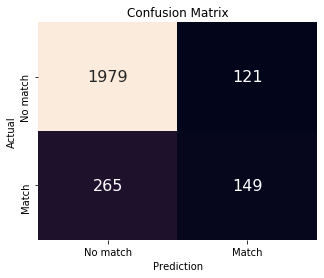

In [45]:
# Loading the KNN best estimator from file
m1_knn = joblib.load('best_KNN.pkl')

knn_pred = m1_knn.predict(D_test)
plot_confusion_matrix(t_test, knn_pred);

Checking for overfitting by fitting the model to the train data

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4898
           1       0.67      0.40      0.50       966

    accuracy                           0.87      5864
   macro avg       0.78      0.68      0.71      5864
weighted avg       0.85      0.87      0.85      5864



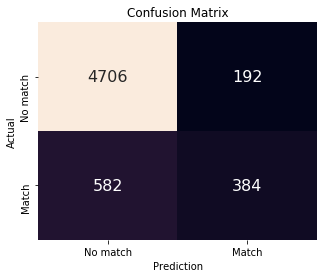

In [46]:
knn_pred_train = m1_knn.predict(D_train)
plot_confusion_matrix(t_train, knn_pred_train);

Performance drops a bit on the Test data.  Indicating perhaps some overfitting exists

#### ROC curve
The ROC curve via this method looks to be good

In [47]:
plot_roc_curve(m1_knn, D_test,"KNN with p=1 and 11 nearest neighbors using 10 features")

alt.LayerChart(...)

### KNN using random forest importance feature selection 

In [48]:
pipe_KNN2 = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN2 = {'rfi_fs__n_features_': [10, 20, D_train.shape[1]],
                   'knn__n_neighbors': [1,3, 5, 9, 11, 15, 21],
                   'knn__p': [1, 2]}

gs_pipe_KNN2 = GridSearchCV(estimator=pipe_KNN2, 
                           param_grid=params_pipe_KNN2, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1,
                           n_jobs = -2)

D_train_np = np.array(D_train)
t_train_np = np.array(t_train)
gs_pipe_KNN2.fit(D_train_np, t_train_np);

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 420 out of 420 | elapsed:  2.4min finished


In [49]:
PerformanceComparison = get_search_results(gs_pipe_KNN2)
rem=PerformanceComparison.columns[1:4]
PerformanceComparison.drop(columns=rem).head()

mean_score  knn__n_neighbors  knn__p  rfi_fs__n_features_
7     0.432203               3.0     1.0                 20.0
10    0.429698               3.0     2.0                 20.0
9     0.428409               3.0     2.0                 10.0
6     0.423942               3.0     1.0                 10.0
16    0.421844               5.0     2.0                 20.0

In [50]:
import altair as alt

alt.Chart(PerformanceComparison, 
          title='KNN Performance Comparison Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='F1 Score', scale=alt.Scale(zero=False)),
    alt.Color('rfi_fs__n_features_:N', title='features')
).facet(column = 'knn__p')

alt.FacetChart(...)

Using the random forest importance for the top 20 features gave the best performance, however it can be noted that performance using top 10 and 20 features wasn't much different from first looks. Again performance using all features is poor and as such shouldn't be used.

#### Features used to select via the Random Forrest Classifier

In [51]:
RF_features_selection_plot(D_train, t_train, n_features = 20)

alt.Chart(...)

In [52]:
import joblib
joblib.dump(gs_pipe_KNN2.best_estimator_, 'best_KNN_RFI.pkl', compress = 1)

['best_KNN_RFI.pkl']

In [53]:
m2_knn = joblib.load('best_KNN_RFI.pkl')
m2_knn

Pipeline(memory=None,
         steps=[('rfi_fs', RFIFeatureSelector(n_features_=20)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=1,
                                      weights='uniform'))],
         verbose=False)

### Predict with KNN and checking for overfitting

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2100
           1       0.51      0.37      0.43       414

    accuracy                           0.84      2514
   macro avg       0.70      0.65      0.67      2514
weighted avg       0.82      0.84      0.83      2514



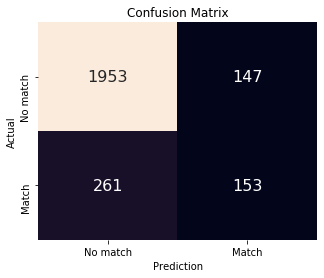

In [54]:
knn_pred = m2_knn.predict(np.array(D_test))
plot_confusion_matrix(t_test, knn_pred);

Checking for overfitting by fitting the model to the train data

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4898
           1       0.67      0.40      0.50       966

    accuracy                           0.87      5864
   macro avg       0.78      0.68      0.71      5864
weighted avg       0.85      0.87      0.85      5864



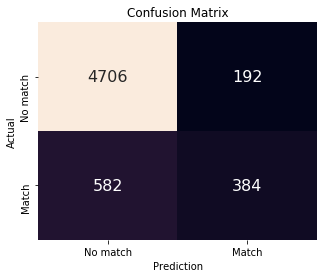

In [55]:
knn_pred_train = m1_knn.predict(D_train_np)
plot_confusion_matrix(t_train, knn_pred_train);

Performance drops 4% on the macro average of F1 score on the test data.  It is expected that the model will have a slight drop in performance compared with the training.

#### Roc curve 

In [56]:
plot_roc_curve(m2_knn, np.array(D_test),"KNN with p=1 and k=3 and 20 features")

alt.LayerChart(...)

ROC curve is an indicating on how well the model can predict.  Since we have significant class imbalance, it is not expected that the ROC curve will be very high.

### Compare performance of two KNN models

In [57]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=111)

cv_results_KNN = cross_val_score(estimator=m1_knn,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
cv_results_KNN.round(3)

array([0.469, 0.381, 0.488, 0.397, 0.462, 0.346, 0.325, 0.496, 0.328,
       0.387, 0.397, 0.371, 0.352, 0.469, 0.325, 0.371, 0.455, 0.288,
       0.439, 0.403, 0.38 , 0.367, 0.378, 0.547, 0.373])

In [58]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=111)

cv_results_KNN_rfs = cross_val_score(estimator=m2_knn,
                                 X=np.array(D_test),
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
cv_results_KNN_rfs.round(3)

array([0.432, 0.438, 0.435, 0.483, 0.372, 0.36 , 0.433, 0.487, 0.362,
       0.365, 0.42 , 0.466, 0.376, 0.524, 0.451, 0.444, 0.534, 0.4  ,
       0.506, 0.417, 0.336, 0.468, 0.51 , 0.507, 0.436])

In [59]:
map ={"KNN_model1": cv_results_KNN, "KNN_model2": cv_results_KNN_rfs}
df=pd.DataFrame(map)
df.head()

KNN_model1  KNN_model2
0    0.468750    0.431655
1    0.380952    0.437500
2    0.487805    0.434783
3    0.396694    0.482759
4    0.461538    0.372093

In [60]:
df.mean()

KNN_model1    0.399710
KNN_model2    0.438414
dtype: float64

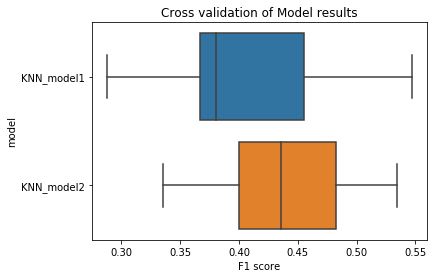

In [61]:
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'model',0:'F1 score'})
# checking which model has higher median performance 
import seaborn as sns

sns.boxplot(x=stacked_data["F1 score"],y=stacked_data["model"]).set_title("Cross validation of Model results");

In [62]:
from statsmodels.stats.multicomp import (MultiComparison)
import scipy.stats as stats
MultiComp = MultiComparison(stacked_data['F1 score'],
                            stacked_data['model'])

# Set up the data for comparison (creates a specialised object)
comp = MultiComp.allpairtest(stats.ttest_rel)
comp[0]

<class 'statsmodels.iolib.table.SimpleTable'>

# KNN Discussion

There is a significant difference when we compare the cross validated results between the 2 knn models.Model 2 with features selected with the Random Forrest importance beats the model selected with the f score importance.  

The average F1 score which is a harmonic of the precision and recall hovers around 44%. This is due to class imbalance which cause low recall score.   In context of the project this is since the cost of making a wrong prediction is not high. Just means the participant will need to go on more dates to meet more people.   

So using the KNN model to predict match, we need to collect the following 20 features from future participants.

The best features are listed below:

In [63]:
RF_features_selection_plot(D_train, t_train, n_features = 20)

alt.Chart(...)

# Probability based machine learning model<a name="nb"></a>

We will test the modelling capability of probability based machine learning model with Gaussian Naive Bayes(NB).   

Naive Bayes assumes all features with gaussian distribution. Hence we'll be using a power transformed data to train the model.

Below we will define a pipleline that will take the following into account

1. Feature selection (number and method)
2. Variance smoothing  

### Gaussian Naive Bayes(NB) selected with F score

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

#define pipline with feature selection
pipe_NB = Pipeline([('fselector', SelectKBest()), 
                     ('NB', GaussianNB())])

#define pipeline for selector
params_pipe_NB = {'fselector__score_func': [f_classif],#, mutual_info_classif],
                  'fselector__k': [10, 20, D_train.shape[1]],
                   'NB__var_smoothing': np.logspace(0,-9, num=100)}


gs_pipe_NB = GridSearchCV(estimator=pipe_NB, 
                           param_grid=params_pipe_NB, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1, 
                                 n_jobs=-2)

Data_transformed = PowerTransformer().fit_transform(D_train)

gs_pipe_NB.fit(Data_transformed, t_train);

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 234 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done 1734 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-2)]: Done 3000 out of 3000 | elapsed:   16.0s finished


In [65]:
search_results_NB = get_search_results(gs_pipe_NB)
rem=search_results_NB.columns[1:4]
search_results_NB.drop(columns=rem).head()

mean_score NB__var_smoothing fselector__k  \
78   0.535955        0.00432876           10   
90   0.535955        0.00187382           10   
87   0.535955        0.00231013           10   
84   0.535955        0.00284804           10   
81   0.535955        0.00351119           10   

                         fselector__score_func  
78  <function f_classif at 0x00000220929B47B8>  
90  <function f_classif at 0x00000220929B47B8>  
87  <function f_classif at 0x00000220929B47B8>  
84  <function f_classif at 0x00000220929B47B8>  
81  <function f_classif at 0x00000220929B47B8>

In [66]:
PerformanceComparison = search_results_NB[search_results_NB['fselector__k'] == 10]

alt.Chart(PerformanceComparison.drop(columns="fselector__score_func"), 
          title='NB Performance Comparison with 10 Features',
          width = 400
         ).mark_line(point = True).encode(
    alt.X('NB__var_smoothing:Q', title='Variance Smoothing', scale=alt.Scale(type='log', base=2),axis=alt.Axis(tickRound=True)),
    alt.Y('mean_score', title='F1 Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

As seen in above table and plot, the best model had a variance smoothing of 0.008 with 10 features selected, there is a slight elbow after this with performance reducing after this.

In [67]:
### Save the model for later use
import joblib
joblib.dump(gs_pipe_NB.best_estimator_, 'best_NB1.pkl', compress = 1)
m1_NB = joblib.load('best_NB1.pkl')
m1_NB

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000220929B47B8>)),
                ('NB',
                 GaussianNB(priors=None, var_smoothing=0.005336699231206307))],
         verbose=False)

#### Predict with the best NB model

In [68]:
Test_transformed = PowerTransformer().fit_transform(D_test)
NB_pred = m1_NB.predict(Test_transformed)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2100
           1       0.42      0.60      0.49       414

    accuracy                           0.80      2514
   macro avg       0.67      0.72      0.68      2514
weighted avg       0.83      0.80      0.81      2514



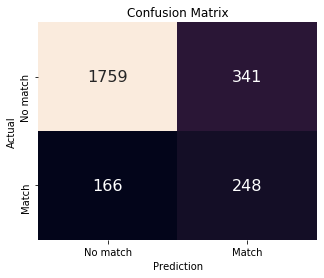

In [69]:
plot_confusion_matrix(t_test, NB_pred);

#### Checking for overfitting

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4898
           1       0.46      0.64      0.53       966

    accuracy                           0.82      5864
   macro avg       0.69      0.75      0.71      5864
weighted avg       0.85      0.82      0.83      5864



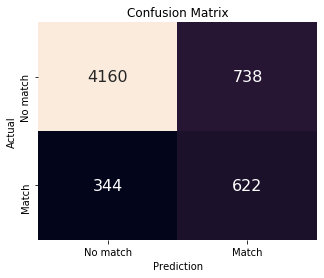

In [70]:
NB_pred_train = m1_NB.predict(Data_transformed)
plot_confusion_matrix(t_train, NB_pred_train);

### NB with RFI selector

In [71]:
#define pipline with feature selection
pipe_NB2 = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('NB', GaussianNB())])

#define pipeline for selector
params_pipe_NB2 = {'rfi_fs__n_features_': [10, 20, D_train.shape[1]],
                   'NB__var_smoothing': np.logspace(0,-9, num=100)}


gs_pipe_NB2 = GridSearchCV(estimator=pipe_NB2, 
                           param_grid=params_pipe_NB2, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1, 
                                 n_jobs=-2)

gs_pipe_NB2.fit(Data_transformed, t_train);

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-2)]: Done 1786 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-2)]: Done 2436 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-2)]: Done 3000 out of 3000 | elapsed: 11.4min finished


In [72]:
search_results_NB2 = get_search_results(gs_pipe_NB2)
rem=search_results_NB2.columns[1:4]
search_results_NB2.drop(columns=rem).head()

mean_score  NB__var_smoothing  rfi_fs__n_features_
76    0.536229           0.005337                 20.0
73    0.536229           0.006579                 20.0
88    0.536114           0.002310                 20.0
79    0.536114           0.004329                 20.0
37    0.536092           0.081113                 20.0

In [96]:
PerformanceComparison = search_results_NB2[search_results_NB2['rfi_fs__n_features_'] == 20]

alt.Chart(PerformanceComparison, 
          title='NB Performance Comparison with 20 Features',
          width = 300
         ).mark_line(point = True).encode(
    alt.X('NB__var_smoothing:Q', title='Variance Smoothing', scale=alt.Scale(type='log', base=2)),
    alt.Y('mean_score', title='F1 Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

In [97]:
### Save the model for later use 
joblib.dump(gs_pipe_NB2.best_estimator_, 'best_NB2.pkl', compress = 1)
m2_NB = joblib.load('best_NB2.pkl')

### Predict with the best NB model

In [98]:
Test_transformed = PowerTransformer().fit_transform(D_test)
NB_pred = m2_NB.predict(Test_transformed)

              precision    recall  f1-score   support

           0       0.92      0.84      0.87      2100
           1       0.42      0.61      0.50       414

    accuracy                           0.80      2514
   macro avg       0.67      0.72      0.69      2514
weighted avg       0.83      0.80      0.81      2514



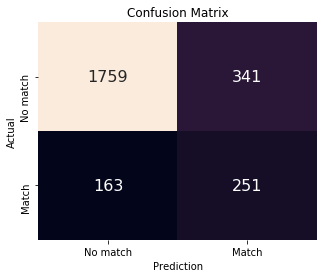

In [99]:
plot_confusion_matrix(t_test, NB_pred);

### Checking for overfitting

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4898
           1       0.47      0.64      0.54       966

    accuracy                           0.82      5864
   macro avg       0.70      0.75      0.71      5864
weighted avg       0.85      0.82      0.83      5864



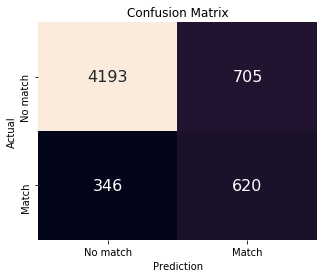

In [100]:
NB_pred_train = m2_NB.predict(Data_transformed)
plot_confusion_matrix(t_train, NB_pred_train);

No obvious overfitting since the predictions on the training data is not drastically greater on the test data.

### ROC curve
To evaluate how the model's TPR compared with the model's FPR.

In [101]:
plot_roc_curve(m2_NB, Test_transformed, "NB with variance smoothing = 0.00035 and 10 features selected using RFI")

alt.LayerChart(...)

### Compare the two NB models

In [102]:
cv_results_NB1 = cross_val_score(estimator=m1_NB,
                                 X=Test_transformed,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
cv_results_NB1.round(3)

array([0.573, 0.407, 0.493, 0.518, 0.513, 0.483, 0.48 , 0.509, 0.531,
       0.471, 0.475, 0.49 , 0.492, 0.535, 0.533, 0.485, 0.528, 0.464,
       0.519, 0.466, 0.476, 0.52 , 0.513, 0.476, 0.472])

In [103]:
cv_results_NB2 = cross_val_score(estimator=m2_NB,
                                 X=Test_transformed,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
cv_results_NB2.round(3)

array([0.554, 0.44 , 0.49 , 0.505, 0.514, 0.508, 0.52 , 0.558, 0.489,
       0.448, 0.487, 0.524, 0.484, 0.524, 0.55 , 0.489, 0.533, 0.487,
       0.534, 0.511, 0.506, 0.515, 0.524, 0.478, 0.491])

In [104]:
map ={"NB_model1": cv_results_NB1, "NB_model2": cv_results_NB2}
df=pd.DataFrame(map)
df.head()

NB_model1  NB_model2
0   0.572864   0.553846
1   0.407407   0.440000
2   0.493023   0.489796
3   0.517766   0.505263
4   0.513369   0.514286

In [105]:
df.mean()

NB_model1    0.496836
NB_model2    0.506507
dtype: float64

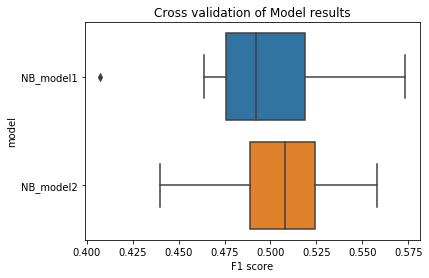

In [106]:
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'model',0:'F1 score'})
# checking which model has higher median performance 
import seaborn as sns

sns.boxplot(x=stacked_data["F1 score"],y=stacked_data["model"]).set_title("Cross validation of Model results");

In [107]:
from statsmodels.stats.multicomp import (MultiComparison)
import scipy.stats as stats
MultiComp = MultiComparison(stacked_data['F1 score'],
                            stacked_data['model'])

# Set up the data for comparison (creates a specialised object)
comp = MultiComp.allpairtest(stats.ttest_rel)
comp[0]

<class 'statsmodels.iolib.table.SimpleTable'>

# NB Discussion

Both NB models receive F1 score of around 50.  This is much better than than using KNN. Model1 using f score selector returned best number of features at 10 while model 2 using random forrest selector selected 20.

On cross validation, the model 2 performed slightly better than model1 and we do see a statistically significant difference.   Therefore we can say using NB, we using 20 features according to Random Forest Importance will be better for a good prediction. 

These features are given below:

In [108]:
RF_features_selection_plot(D_train, t_train, n_features = 20)

alt.Chart(...)

# Information Based Machine Learning Models<a name="dt"></a>

We will use decision tree (DT) and random forrest (RF) in this section to model the data.    We will use the gridsearch cross validation methods to tune within our range limit for the parameters.

We expect the decision tree based models will perform better on features selected with the rfi selector since the selector is information based.  

### Decision Tree using f_score

Below we will define a pipleline that will take the following into account

1. Feature selection (number and method)
2. Criterion
3. Maximum depth 
4. Minimum sample split

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=88)

#define pipline with feature selection

pipe_DT = Pipeline([('fselector', SelectKBest()), 
                      ('dt', DecisionTreeClassifier(random_state=88))])

params_pipe_DT = {'fselector__score_func': [f_classif],#, mutual_info_classif],
                   'fselector__k': [10, 20, D_train.shape[1]],
                   'dt__max_depth': range(2,20),
                   'dt__criterion': ['gini','entropy'],
                    'dt__min_samples_split': range(2,12)
                    }

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                           param_grid=params_pipe_DT, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1, 
                           n_jobs=-2)

gs_pipe_DT.fit(D_train, t_train);

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 190 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 1390 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-2)]: Done 3390 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-2)]: Done 6190 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 9790 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 10800 out of 10800 | elapsed:  2.2min finished


The table for the top 5 models is given by the table below.   We see there is not much difference between the mean core across each of the functions.   The optimal depth is 7 and best criterion is ginni

In [110]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

mean_score  std_score max_score min_score dt__criterion dt__max_depth  \
150   0.435845   0.037344  0.487952  0.361111          gini             7   
153   0.433998  0.0387205  0.487952  0.361111          gini             7   
168   0.432929  0.0357574  0.481928  0.359862          gini             7   
171   0.432213  0.0382239  0.483384  0.348432          gini             7   
156    0.43169  0.0393768  0.489426  0.352941          gini             7   

    dt__min_samples_split fselector__k  \
150                     2           10   
153                     3           10   
168                     8           10   
171                     9           10   
156                     4           10   

                          fselector__score_func  
150  <function f_classif at 0x00000220929B47B8>  
153  <function f_classif at 0x00000220929B47B8>  
168  <function f_classif at 0x00000220929B47B8>  
171  <function f_classif at 0x00000220929B47B8>  
156  <function f_classif at 0x00000220929B47B8>

Best function is given with the parameters below

In [111]:
gs_pipe_DT.best_estimator_

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000220929B47B8>)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=7,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=88,
                                        splitter='best'))],
         verbose=False)

Plotting the decision tree comparisions in the graph below.  We see the model have a high performance at maximum depth of 3 then drops sharply.  It then have a peak around y.    We see as min samples inncrease, the performance of the tree reduces slight.  Although not by much.

We can potentially use a higher min samples to reduce overfitting

In [112]:
import altair as alt
alt.Chart(results_DT.drop(columns="fselector__score_func"), 
          title='Decision Tree Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('dt__max_depth', title='Maximum Depth'),
    alt.Y('mean_score', title='Mean CV Score', scale=alt.Scale(zero=False), aggregate='average'),
    color= 'dt__min_samples_split:N'
).facet(column='dt__criterion')


alt.FacetChart(...)

Performance for different min_samples_split's was nearly the same for both criterion.

Dump the best estimator to a file and load the best estimator as m1_DT

In [113]:
import joblib
joblib.dump(gs_pipe_DT.best_estimator_, 'best_DT.pkl', compress = 1)
m1_DT = joblib.load('best_DT.pkl')
m1_DT

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000220929B47B8>)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=7,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=88,
                                        splitter='best'))],
         verbose=False)

### Overfitting - Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2100
           1       0.51      0.42      0.46       414

    accuracy                           0.84      2514
   macro avg       0.70      0.67      0.68      2514
weighted avg       0.83      0.84      0.83      2514



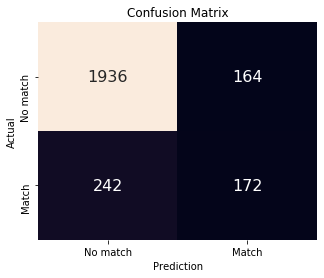

In [114]:
pred= m1_DT.predict(D_test)
plot_confusion_matrix(t_test, pred);

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4898
           1       0.67      0.50      0.57       966

    accuracy                           0.88      5864
   macro avg       0.79      0.73      0.75      5864
weighted avg       0.87      0.88      0.87      5864



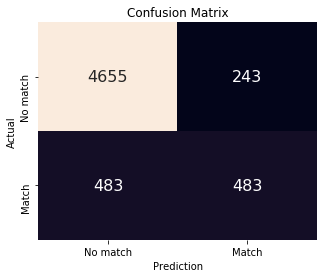

In [115]:
pred_Train = m1_DT.predict(D_train)
plot_confusion_matrix(t_train, pred_Train);

###  Overfitting discussion

We see that there is 11% difference between the F1 score for 'match'.   This is an indication of overfitting on the training data.  We need to look into ways to control over fitting of the model if it is chosen to be the best style of model for the speed dating data

In [116]:
plot_roc_curve(m1_DT, D_test,"Decision Tree")

alt.LayerChart(...)

In [117]:
#Creating a model for comparaison 
cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=111)
best_DT = cross_val_score(estimator=m1_DT,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
best_DT.round(3)

array([0.446, 0.313, 0.479, 0.281, 0.323, 0.297, 0.311, 0.421, 0.394,
       0.298, 0.324, 0.378, 0.387, 0.326, 0.374, 0.378, 0.429, 0.338,
       0.36 , 0.362, 0.305, 0.486, 0.43 , 0.469, 0.351])

### Decision Tree Using RFI selector

In [118]:

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=88)

#define pipline with feature selection

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                      ('dt', DecisionTreeClassifier(random_state=88))])

params_pipe_DT = {'rfi_fs__n_features_': [10],#, 20, D_train.shape[1]],
                   'dt__max_depth': range(3,12),
                   'dt__criterion': ['gini','entropy'],
                    'dt__min_samples_split': range(2,5)
                    }

gs_pipe_DT_rfi = GridSearchCV(estimator=pipe_DT, 
                           param_grid=params_pipe_DT, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1, 
                           n_jobs=-2)

gs_pipe_DT_rfi.fit(D_train_np, t_train_np);

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 540 out of 540 | elapsed:  2.1min finished


In [119]:
gs_pipe_DT_rfi.best_estimator_

Pipeline(memory=None,
         steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=88,
                                        splitter='best'))],
         verbose=False)

In [120]:
results_DT = get_search_results(gs_pipe_DT_rfi)
results_DT.head()

mean_score  std_score max_score min_score dt__criterion dt__max_depth  \
9    0.434612  0.0374773  0.497268  0.366102          gini             6   
10   0.434608   0.037232  0.495913  0.366102          gini             6   
11   0.434206  0.0372649  0.495913  0.366102          gini             6   
41   0.428248  0.0473451  0.495677  0.318021       entropy             7   
40   0.427586  0.0471218  0.495677  0.318021       entropy             7   

   dt__min_samples_split rfi_fs__n_features_  
9                      2                  10  
10                     3                  10  
11                     4                  10  
41                     4                  10  
40                     3                  10

In [121]:
import altair as alt
alt.Chart(results_DT, 
          title='Decision Tree Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('dt__max_depth', title='Maximum Depth'),
    alt.Y('mean_score', title='Mean CV Score', scale=alt.Scale(zero=False), aggregate='average'),
    color= 'dt__min_samples_split:N'
).facet(column='dt__criterion')


alt.FacetChart(...)

Dump the best estimator to a file and load the best estimator as m3_DT

In [122]:
import joblib
joblib.dump(gs_pipe_DT_rfi.best_estimator_, 'best_DT_rfi.pkl', compress = 1)
m2_DT = joblib.load('best_DT_rfi.pkl')
m2_DT

Pipeline(memory=None,
         steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=88,
                                        splitter='best'))],
         verbose=False)

### Overfitting - check

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2100
           1       0.54      0.41      0.47       414

    accuracy                           0.84      2514
   macro avg       0.71      0.67      0.69      2514
weighted avg       0.83      0.84      0.84      2514



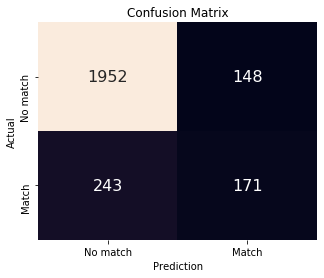

In [123]:
D_test_np = np.array(D_test)
pred= m2_DT.predict(D_test_np)
plot_confusion_matrix(t_test, pred);

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4898
           1       0.63      0.47      0.54       966

    accuracy                           0.87      5864
   macro avg       0.77      0.71      0.73      5864
weighted avg       0.86      0.87      0.86      5864



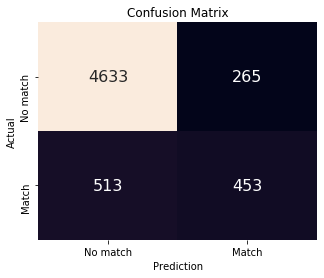

In [124]:
pred_Train = m2_DT.predict(D_train_np)
plot_confusion_matrix(t_train, pred_Train);

### Overfitting discussion

The model selected using the RFI selector controls over fitting better.  The difference between training and test F1 score for 'match' is 7%.  This is a significant improvement on the training score of the f score feature selected model.  Hence by using the RFI selector, it appears to make the model less pron to overfitting.


### ROC curve

In [125]:
plot_roc_curve(m2_DT, D_test_np,"Decision Tree rfi")

alt.LayerChart(...)

In [126]:
#Creating a model for comparaison 
cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=111)
best_DT2 = cross_val_score(estimator=m2_DT,
                                 X=D_test_np,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
best_DT2.round(3)

array([0.393, 0.341, 0.359, 0.31 , 0.412, 0.269, 0.409, 0.449, 0.436,
       0.25 , 0.318, 0.409, 0.424, 0.405, 0.403, 0.357, 0.412, 0.336,
       0.338, 0.4  , 0.411, 0.377, 0.375, 0.438, 0.395])

## Decision tree with categorical features
The data comes with preprocessed bined categorical data.  Research should be going into each column to determine how each categories have been binned.  Additional research into understanding the psycology of dating to create meaninful binned numbers would help to improve the model.  Here we are assuming the binning have done by industry experts who put these binns in meaninful order

Since the categories are binned, there is a natural order to the information, hence it would be appropriate to use label encoder.

Additionally because we want to select the most important features to understand what are the most important criterias for match.  Hence it is important to keep the features together.

In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_cat = df_d.copy()
for col in df_d:
    data_cat[col] = le.fit_transform(df_d[col])
    
data_cat = preprocessing.MinMaxScaler().fit_transform(data_cat)

#Fit test train split to categorical data
from sklearn.model_selection import train_test_split

D_train2, D_test2, t_train2, t_test2 = \
    train_test_split(data_cat, target, test_size = 0.3, 
                     stratify=target, shuffle=True, random_state=88)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=88)

#define pipline with feature selection

pipe_DT = Pipeline([('fselector', SelectKBest()), 
                      ('dt', DecisionTreeClassifier(random_state=88))])

params_pipe_DT = {'fselector__score_func': [f_classif],#, mutual_info_classif],
                   'fselector__k': [10, 20, D_train.shape[1]],
                   'dt__max_depth': range(2,10),
                   'dt__criterion': ['gini','entropy'],
                    'dt__min_samples_split': range(2,12),
                  
                    }


gs_pipe_DT_cat = GridSearchCV(estimator=pipe_DT, 
                           param_grid=params_pipe_DT, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1, 
                           n_jobs=-2)

gs_pipe_DT_cat.fit(D_train2, t_train2);

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 346 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 3946 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-2)]: Done 4800 out of 4800 | elapsed:   16.4s finished


In [128]:
results_DT = get_search_results(gs_pipe_DT_cat)
results_DT.head()

mean_score  std_score max_score min_score dt__criterion dt__max_depth  \
177   0.373297  0.0693896  0.447284  0.214876          gini             7   
174   0.372505  0.0694647  0.447284  0.213115          gini             7   
150   0.370646  0.0707136  0.448378  0.212245          gini             7   
153   0.370483  0.0705111  0.448378  0.213992          gini             7   
171   0.370478  0.0686381  0.447284  0.212245          gini             7   

    dt__min_samples_split fselector__k  \
177                    11           10   
174                    10           10   
150                     2           10   
153                     3           10   
171                     9           10   

                          fselector__score_func  
177  <function f_classif at 0x00000220929B47B8>  
174  <function f_classif at 0x00000220929B47B8>  
150  <function f_classif at 0x00000220929B47B8>  
153  <function f_classif at 0x00000220929B47B8>  
171  <function f_classif at 0x00000220929B47B8>

In [129]:
import altair as alt
alt.Chart(results_DT.drop(columns="fselector__score_func"), 
          title='Decision Tree Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('dt__max_depth', title='Maximum Depth'),
    alt.Y('mean_score', title='Mean CV Score', scale=alt.Scale(zero=False), aggregate='average'),
    color= 'dt__criterion:N'
)


alt.Chart(...)

In [130]:
import joblib
joblib.dump(gs_pipe_DT_cat.best_estimator_, 'best_DT_cat.pkl', compress = 1)
m3_DT = joblib.load('best_DT_cat.pkl')
m3_DT

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000220929B47B8>)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=7,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=11,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=88,
                                        splitter='best'))],
         verbose=False)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2100
           1       0.50      0.34      0.40       414

    accuracy                           0.84      2514
   macro avg       0.69      0.63      0.65      2514
weighted avg       0.81      0.84      0.82      2514



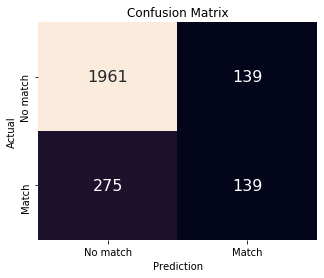

In [131]:
pred= m3_DT.predict(D_test2)
plot_confusion_matrix(t_test2, pred);

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4898
           1       0.59      0.36      0.45       966

    accuracy                           0.85      5864
   macro avg       0.73      0.65      0.68      5864
weighted avg       0.83      0.85      0.84      5864



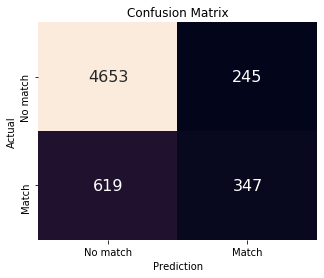

In [132]:
pred_Train = m3_DT.predict(D_train2)
plot_confusion_matrix(t_train2, pred_Train);

Between the train and test results, binning seems to have reduced some of the overfitting.

In [133]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=111)

best_DT3 = cross_val_score(estimator=m3_DT,
                                 X=D_test2,
                                 y=t_test2, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
best_DT3.round(3)

array([0.322, 0.262, 0.403, 0.204, 0.176, 0.276, 0.286, 0.415, 0.319,
       0.293, 0.212, 0.288, 0.301, 0.303, 0.27 , 0.259, 0.274, 0.196,
       0.381, 0.245, 0.305, 0.39 , 0.23 , 0.357, 0.222])

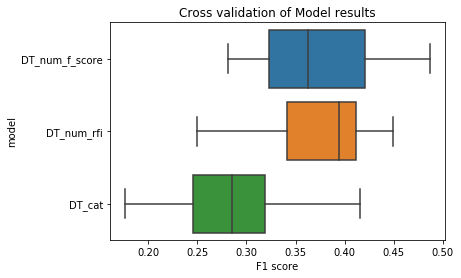

In [134]:
map ={"DT_num_f_score": best_DT, 
      "DT_num_rfi": best_DT2,
     "DT_cat": best_DT3}
df=pd.DataFrame(map)

#box plot
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'model',0:'F1 score'})
# checking which model has higher median performance 
import seaborn as sns

sns.boxplot(x=stacked_data["F1 score"],y=stacked_data["model"]).set_title("Cross validation of Model results");

In [135]:
from statsmodels.stats.multicomp import (MultiComparison)
import scipy.stats as stats
MultiComp = MultiComparison(stacked_data['F1 score'],
                            stacked_data['model'])

# Set up the data for comparison (creates a specialised object)
comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
print (comp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
    group1         group2       stat   pval  pval_corr reject
-------------------------------------------------------------
        DT_cat DT_num_f_score  -7.346    0.0       0.0   True
        DT_cat     DT_num_rfi -6.2266    0.0       0.0   True
DT_num_f_score     DT_num_rfi -0.5645 0.5777    0.5777  False
-------------------------------------------------------------


# Decision Tree Discussion:

Using categorical data have actually made the model's predicting ability worsen.   This could be due to binning, we have actually reduced the information available in the data.  Hence making it predict worse. 

So although binning the information could have benefits of improving the ease of collecting the data, and increasing the speed to implement the model.  It is done at a cost of accuracy.   This needs to be considered

We will rule out using categorical features in our modelling process since it performs signficantly worse than using numerical features.

There is not signfiicant evidence that decision tree with features selected with the f score method is significantly different from model selected via the rfi method.   Both uses 10 features.   The features are listed below:

In [136]:
RF_features_selection_plot(D_train, t_train, n_features = 10)

alt.Chart(...)

# Random Forest<a name="rf"></a>

Random forrest is an ensemble of decision trees.   Hence we would expect it to outperform decision tree models.   There are a number of criterions we can select the models.   Here we are picking just a few to maximise the performance.

In line with the other models, we will be using the F1 score as the score to maximise.  This is because of our imbalance of targets.

### Random Forrest features selected with F score

1. Feature selection (number and method)
2. Criterion
3. Number of estimators

In [137]:
pipe_RF = Pipeline([('fselector', SelectKBest()), 
                      ('rf', RandomForestClassifier(random_state=88))])

params_pipe_RF = {'fselector__score_func': [f_classif],#, mutual_info_classif],
                   'fselector__k': [10, 20, D_train.shape[1]],
                  'rf__n_estimators':[100,200,500,1000],
                   'rf__criterion': ['gini','entropy']}


gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                           param_grid=params_pipe_RF, 
                           cv=cv_method,
                           scoring='f1',
                           verbose=1, 
                           n_jobs=-2)
gs_pipe_RF.fit(D_train, t_train);

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 240 out of 240 | elapsed:  3.2min finished


Below are the top 5 results from the Random forrest selector selecting with the f_score function

In [138]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head()

mean_score  std_score max_score min_score fselector__k  \
7   0.432085  0.0214488  0.458472  0.393443           10   
3   0.431544  0.0195785  0.461017  0.397351           10   
6    0.42886   0.020996  0.456376  0.385382           10   
1   0.427354  0.0267172  0.459459  0.382253           10   
2   0.426816  0.0183946  0.446667  0.393443           10   

                        fselector__score_func rf__criterion rf__n_estimators  
7  <function f_classif at 0x00000220929B47B8>       entropy             1000  
3  <function f_classif at 0x00000220929B47B8>          gini             1000  
6  <function f_classif at 0x00000220929B47B8>       entropy              500  
1  <function f_classif at 0x00000220929B47B8>          gini              200  
2  <function f_classif at 0x00000220929B47B8>          gini              500

Visualising the results in the chart below.  We see a peak at 500 estimators.   And entropy criterion outperforms the gini.  To further tune the model, there are other cross validation methods we should be employing.  However due to time constraint we are able to only test the overall cross validation on a few.

In [139]:
alt.Chart(results_RF.drop(columns="fselector__score_func"), 
          title='Random Forest Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('rf__n_estimators', title='Maximum number of estimators'),
    alt.Y('mean_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False)),
    color= 'rf__criterion:N'
)

alt.Chart(...)

In [140]:
joblib.dump(gs_pipe_RF.best_estimator_, 'best_RF.pkl', compress = 1)
m1_RF = joblib.load('best_RF.pkl')
m1_RF

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000220929B47B8>)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=88,
                                        verbose=0, warm_start=False)

### Random forrest optimised with features selected with RFI selector

Below we will define a pipleline that will take the following into account

1. Feature selection (number and method)
2. Criterion - Gini
6. Number of estimators  

In [141]:
pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                      ('rf', RandomForestClassifier(random_state=88))])

params_pipe_RF2 = {'rfi_fs__n_features_': [10, 20, D_train.shape[1]],
                   'rf__n_estimators': [50,100,300,500]}

gs_pipe_RF2 = GridSearchCV(estimator=pipe_RF, 
                           param_grid=params_pipe_RF2, 
                           cv=cv_method,
                           scoring='f1',
                         
                           verbose=1, 
                           n_jobs=-2)
gs_pipe_RF2.fit(D_train_np, t_train_np);

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:  1.3min finished


In [142]:
results_RF2 = get_search_results(gs_pipe_RF2)
results_RF2.head()

mean_score  std_score  max_score  min_score  rf__n_estimators  \
6     0.423556   0.032300   0.484642   0.364912             300.0   
9     0.423311   0.031033   0.486486   0.371930             500.0   
10    0.419308   0.050096   0.529617   0.341818             500.0   
3     0.417648   0.033549   0.481356   0.371930             100.0   
7     0.416361   0.043334   0.524823   0.353791             300.0   

    rfi_fs__n_features_  
6                  10.0  
9                  10.0  
10                 20.0  
3                  10.0  
7                  20.0

In [143]:
alt.Chart(results_RF2, 
          title='Random Forest Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('rf__n_estimators', title='Maximum number of estimators'),
    alt.Y('mean_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False)),
    color= 'rfi_fs__n_features_:N'
)

alt.Chart(...)

From the plot we can see a peak at 300 estimators.   ALso the models have a better accuracy using 10 feature ovall compared with other models

Best model criteria is selected below

In [144]:
joblib.dump(gs_pipe_RF2.best_estimator_, 'best_RF2.pkl', compress = 1)
m2_RF = joblib.load('best_RF2.pkl')
m2_RF

Pipeline(memory=None,
         steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,
                                        oob_score=False, random_state=88,
                                        verbose=0, warm_start=False))],
         verbose=False)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2100
           1       0.64      0.34      0.45       414

    accuracy                           0.86      2514
   macro avg       0.76      0.65      0.68      2514
weighted avg       0.84      0.86      0.84      2514



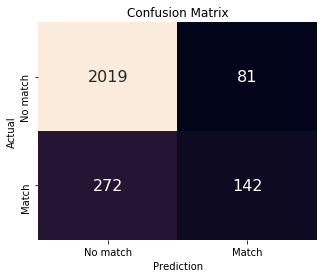

In [145]:
pred= m2_RF.predict(D_test_np)
plot_confusion_matrix(t_test, pred);

In [146]:
cv_method_ttest

RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=111)

In [147]:
#Creating a model for comparaison 

best_RF1 = cross_val_score(estimator=m1_RF,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
best_RF1.round(3)

array([0.475, 0.4  , 0.448, 0.397, 0.443, 0.387, 0.413, 0.471, 0.33 ,
       0.407, 0.429, 0.374, 0.397, 0.457, 0.345, 0.397, 0.427, 0.333,
       0.387, 0.382, 0.407, 0.379, 0.397, 0.496, 0.362])

In [148]:
#Creating a model for comparaison 

best_RF2 = cross_val_score(estimator=m2_RF,
                                 X=D_test_np,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='f1')
best_RF2.round(3)

array([0.472, 0.403, 0.468, 0.37 , 0.414, 0.353, 0.407, 0.576, 0.349,
       0.394, 0.368, 0.413, 0.35 , 0.483, 0.45 , 0.417, 0.433, 0.373,
       0.473, 0.371, 0.367, 0.397, 0.452, 0.504, 0.374])

# Final comparison of best models<a name="compare"></a>

We will copare the cross validated results of:

* Distance based model - KNN
* Probability based model - NB

with the results we gained from the two information based models:
* Decision Tree
* Random Forrest

We will then compare the results from 5 times 5 fold cross validation to determine which type of model performs best.   

In [149]:
map ={"KNN": cv_results_KNN_rfs, "NB": cv_results_NB2, "DT": best_DT, "DT2": best_DT2, "RF1": best_RF1,"RF2":best_RF2}
df=pd.DataFrame(map)
df.head()

KNN        NB        DT       DT2       RF1       RF2
0  0.431655  0.553846  0.446043  0.393162  0.475410  0.472441
1  0.437500  0.440000  0.313433  0.341463  0.400000  0.403101
2  0.434783  0.489796  0.479452  0.358621  0.447761  0.467742
3  0.482759  0.505263  0.281250  0.310078  0.396552  0.370370
4  0.372093  0.514286  0.322581  0.411765  0.442623  0.414414

#### Visualise the models for comparision

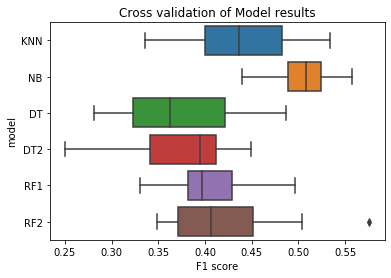

In [150]:
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'model',0:'F1 score'})
# checking which model has higher median performance 
import seaborn as sns

sns.boxplot(x=stacked_data["F1 score"],y=stacked_data["model"]).set_title("Cross validation of Model results");

# Multiple comparison pair test 

Reference:
https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/


In [151]:
from statsmodels.stats.multicomp import (MultiComparison)
import scipy.stats as stats
MultiComp = MultiComparison(stacked_data['F1 score'],
                            stacked_data['model'])

#converting this multiple comparison paired t test result into a nice data frame :) 
comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
compa=pd.DataFrame(comp[0])
compa=compa.iloc[1:,0:4]
compa = compa.rename(columns={0: 'c', 1: 'c1',2:'stat',3:'pval'})
compa['pval']=compa['pval'].astype(str).astype(float)
compa['stat']=compa['stat'].astype(str).astype(float)
compa.loc[compa["pval"]<=0.05,"result"]= "reject"
compa.loc[compa["pval"]>0.05,"result"]= "fail to reject"
compa.loc[compa["result"]=="reject",:]
compa["pair"]=compa["c"].astype(str)+ " - " +compa["c1"].astype(str)
compa.drop(columns=["c","c1"],axis=1)
compa = compa[['pair', 'pval', 'result']]
all_comp_ttest_models = compa.copy()

All pairs that are significantly different from each other shown below:

In [152]:
all_comp_ttest_models

pair    pval          result
1    DT - DT2  0.5777  fail to reject
2    DT - KNN  0.0000          reject
3     DT - NB  0.0000          reject
4    DT - RF1  0.0111          reject
5    DT - RF2  0.0006          reject
6   DT2 - KNN  0.0001          reject
7    DT2 - NB  0.0000          reject
8   DT2 - RF1  0.0259          reject
9   DT2 - RF2  0.0033          reject
10   KNN - NB  0.0000          reject
11  KNN - RF1  0.0098          reject
12  KNN - RF2  0.0331          reject
13   NB - RF1  0.0000          reject
14   NB - RF2  0.0000          reject
15  RF1 - RF2  0.1887  fail to reject

# Summary<a name="summary"></a>

In this project we wanted to find
1. What is the best type of model to predict a match for the speed dating data
2. What are the best set of criterias to predict if two people will be a match.


In the final comparison of
* Distance based model - KNN
* Probability based model - NB
* Information based model - DT and RF

We find that **Probability based model Gaussian naïve Bayes (NB) perform best**.   We see from the paired t-test and box plot that the cross validation results is significantly better than other models.   We find with the probability model, selecting 20 features with random forrest selector in this preliminary study have yielded the best resultsl.

While we did have high hopes for the information based model, we found that it under performed.  When categorical data is applied we found the model performed worse on prediction but better on overfitting.   From this result we can infer that although binning the data into categories can make the data gathering process simpler, it comes at a cost of accuracy.

Finally we can conclude for the project that speed dating match results are **best modelled with Probability based models with top 20 features.**

#### Looking at the features

In [154]:
RF_features_selection_plot(D_train, t_train, n_features = 20)

alt.Chart(...)

We can see from the categories, liking the other party comes first followed by funny, mutual attractiveness and shared interest.   

It is interesting to note that intelligence, sincerety, age difference, same race, matter much less in contributing to a match result.   Although these attributes may be essential for long term relationships, it shows that at the end, humans are still emotional creatures.  Being funny and being attractive can gain attention and good rapport fast.  Much faster than other attributes.

This is probably why most people write in their dating app profile that they want someone who makes them laugh?

# Further steps

Since we have identified probability based models outperform other model types in modelling this speed dating data.  We can improve upon the accuracy of predictions by:

* Feature engineering - combine, or augment some of the top selection features under supervision of human behaviour specialist to creat better features from the responses.

* Apply more advanced probability based models.

* Explore ways to deal with class imbalance in the data.   In this study we only managed class imbalance by selecting F1 score as the optimising score since we are only trying to determine the best type of model and resulting features.   More advanced techniques can be used to deal with class imbalance when training the model.   This can be implemented in the next step.

The above three points are just some of the steps to further optimise speed dating modeling results.  This project is just a beginning.  There are more future research we could do.

# Reference<a name="ref"></a>

[Speed Dating datset from OpenML](https://www.openml.org/d/40536)

[Optimising score selection](https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124)

[FeaturesSelection.com](https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/)  

Code taken from RMIT MATH2319 Tutorial on SK5  

Mutiple comparison ttest from : https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/